In [1]:
library('ggplot2')
library('ggpubr')
library('scales')
library('tidyverse')

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /mnt/ndata/arvind/envs/R_4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Zurich
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4    
 [5] purrr_1.0.2     readr_2.1.5     tidyr_1.3.0     tibble_3.2.1   
 [9] tidyverse_2.0.0 scales_1.3.0    ggpubr_0.6.0    ggplot2_3.4.4  

loaded via a namespace

In [3]:
jaccard <- function(a, b) {
    intersection = length(intersect(a, b))
    union = length(a) + length(b) - intersection
    return (intersection/union)
}

In [4]:
confusion_matrix <- function(a,b,not_a){
    p = length(a)
    n=  length(not_a)
    total = p+n
    tp = length(intersect(a, b))
    fn = p-tp
    fp = length(setdiff(b,a))
    tn = n - fp
    return(list(tp,fn,fp,tn))
}

In [5]:
a <- c(1:10)
b <- c(20:100)
jaccard(a,b)

[1] 0

# Pan-Cancer

## SelectSim

In [6]:
select_orginal <- readRDS('/mnt/ptemp/arvind/catalogue_work_update/data/results/pan_can/pan_can_tcga_run_result.rds')

In [7]:
boot_results <- list()
k=1
for (i in c(31:35)){
    name <- paste('/mnt/ptemp/arvind/robustness_analysis/TCGA robustness analysis/output_v4/sampling_run_results_',i,'.rds',sep="")
    boot_results[[k]] <- (readRDS(file=name))$result
    k=k+1
}

In [8]:
length(boot_results)

[1] 5

In [9]:
head(boot_results[[1]])

,SFE_1,SFE_2,name,support_1,support_2,freq_1,freq_2,overlap,w_overlap,max_overlap,⋯,w_r_overlap,wES,wFDR,nES,mean_r_nES,nFDR,cum_freq,nFDR2,type,FDR
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
PIK3CA - TP53,PIK3CA,TP53,PIK3CA - TP53,899,2443,0.12372695,0.33622351,287,255.945882,526,⋯,312.75982,-40.17352,0.0000000000,-33.83972,-6.333800,0.0000000000,3342,0.0000000000,ME,TRUE
BRAF - TP53,BRAF,TP53,BRAF - TP53,467,2443,0.06427195,0.33622351,63,42.680952,139,⋯,92.80300,-35.44164,0.0000000000,-31.35929,-4.082348,0.0000000000,2910,0.0000000000,ME,TRUE
KRAS - TP53,KRAS,TP53,KRAS - TP53,555,2443,0.07638315,0.33622351,213,198.477002,464,⋯,244.89883,-32.82519,0.0000000000,-27.66273,-5.162455,0.0000000000,2998,0.0000000000,ME,TRUE
TP53 - ARID1A,TP53,ARID1A,TP53 - ARID1A,2443,438,0.33622351,0.06028076,111,88.565879,285,⋯,133.66527,-31.89009,0.0000000000,-27.28199,-4.608097,0.0000000000,2881,0.0000000000,ME,TRUE
BRAF - NRAS,BRAF,NRAS,BRAF - NRAS,467,190,0.06427195,0.02614919,7,3.801353,148,⋯,41.73186,-26.82092,0.0003178134,-24.31588,-2.505038,0.0000000000,657,0.0000000000,ME,TRUE
CTNNB1 - TP53,CTNNB1,TP53,CTNNB1 - TP53,241,2443,0.03316818,0.33622351,39,34.700267,186,⋯,72.86760,-26.98838,0.0003707824,-23.49519,-3.493186,0.0001853912,2684,0.0002224694,ME,TRUE


In [10]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(nFDR2<=0.25) 

In [11]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$name)
rownames(score_df)<-score_df$pairs
#score_df$Run_100<-1

In [12]:
selectX_mcc <- list()
selectX_recall<-list()

In [13]:
for (t in c(1:5)){
    temp <- (boot_results[[t]] %>% filter(name %in% score_df$pairs) %>% filter(nFDR2<=0.25))$name
    conf <- confusion_matrix(score_df$pairs,temp,setdiff(select_orginal$name,score_df$pairs))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    selectX_mcc[[t]]<-mcc
    selectX_recall <- conf[[1]]/(conf[[1]]+conf[[2]])
}

## Select

In [14]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/select/tcga_select_all_results.rds')

In [15]:
boot_results <- list()
k=1
for (i in c(1:5)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/select/sampling_run_tcga_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [16]:
length(boot_results)

[1] 5

In [17]:
head(boot_results[[1]])

,SFE_1,SFE_2,name,type_1,type_2,int_type,support_1,support_2,freq_1,freq_2,⋯,abs_diff_overlap,direction,wMI_stat,wMI_p.value,ME_p.value,E.r.wMI_stat,MI_diff,wMI_p.value_FDR,select_score_good_cancer_cell_2017_criterion_1,select_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
AKT1 - ALK,AKT1,ALK,AKT1 - ALK,MUT,MUT,MUT - MUT,57,29,0.009463722,0.004814876,⋯,0.340,CO,2.365631e-04,0.893,0.490,0.002503087,-0.002266524,FALSE,FALSE,NA
AKT1 - APC,AKT1,APC,AKT1 - APC,MUT,MUT,MUT - MUT,57,370,0.009463722,0.061431180,⋯,0.910,ME,1.017148e-02,0.401,0.401,0.010171477,0.000000000,FALSE,FALSE,NA
AKT1 - AR,AKT1,AR,AKT1 - AR,MUT,MUT,MUT - MUT,57,21,0.009463722,0.003486635,⋯,0.576,CO,3.728933e-05,1.000,0.352,0.001904909,-0.001867620,FALSE,FALSE,NA
AKT1 - ATM,AKT1,ATM,AKT1 - ATM,MUT,MUT,MUT - MUT,57,181,0.009463722,0.030051469,⋯,0.729,CO,8.141605e-04,0.786,0.414,0.002666180,-0.001852019,FALSE,FALSE,NA
AKT1 - BAP1,AKT1,BAP1,AKT1 - BAP1,MUT,MUT,MUT - MUT,57,86,0.009463722,0.014278599,⋯,0.484,ME,5.076404e-03,0.602,0.602,0.005076404,0.000000000,FALSE,FALSE,NA
AKT1 - BRAF,AKT1,BRAF,AKT1 - BRAF,MUT,MUT,MUT - MUT,57,467,0.009463722,0.077536112,⋯,4.881,CO,1.129453e-03,1.000,0.003,0.006048236,-0.004918783,FALSE,FALSE,0.0003347614


In [18]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(wMI_p.value_FDR) 

In [19]:
select_orginal %>% filter(wMI_p.value_FDR)  %>% count()

n
<int>
196


In [20]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$name)
rownames(score_df)<-score_df$pairs
#score_df$Run_100<-1

In [21]:
head(score_df)

,pairs
,<chr>
AKT1 - PIK3CA,AKT1 - PIK3CA
AKT1 - PIK3R1,AKT1 - PIK3R1
AKT1 - PTEN,AKT1 - PTEN
AKT1 - MAP3K1,AKT1 - MAP3K1
AKT1 - GAB1,AKT1 - GAB1
APC - BRAF,APC - BRAF


In [22]:
select_mcc <- list()

In [23]:
for (t in c(1:5)){
    #score_df[[paste('Run',i,sep="_")]]<-0
    temp <- (boot_results[[t]] %>% filter(name %in% score_df$pairs) %>% filter(wMI_p.value_FDR))$name
    #select_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    conf <- confusion_matrix(score_df$pairs,temp,setdiff(select_orginal$name,score_df$pairs))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    select_mcc[[t]]<-mcc
    #score_df[temp,][[paste('Run',i,sep="_")]]<-1
}

## Discover

In [24]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/Discover/tcga_all.rds')

In [25]:
boot_results <- list()
k=1
for (i in c(1:5)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/Discover/sampling_run_tcga_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [26]:
length(boot_results)

[1] 5

In [27]:
head(boot_results[[1]])

,gene1,gene2,p.value,q.value,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
12,NRAS,BRAF,6.868518e-32,1.537369e-30,ME
54,PIK3R1,PIK3CA,2.070028e-11,1.259451e-09,ME
47,TP53,KRAS,6.322977e-09,4.249069e-07,ME
22,TP53,CTNNB1,2.997517e-08,1.708207e-06,ME
45,NRAS,KRAS,6.500724e-08,3.360669e-06,ME
11,KRAS,BRAF,3.312124e-07,1.663585e-05,ME


In [28]:
head(select_orginal)

,gene1,gene2,p.value,q.value,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
25,NRAS,BRAF,5.101043e-36,1.257836e-34,ME
142,PIK3R1,PIK3CA,7.150757e-16,3.654473e-14,ME
23,KRAS,BRAF,3.655192e-10,3.114309e-08,ME
110,TP53,KRAS,3.249735e-09,2.587024e-07,ME
50,TP53,CTNNB1,8.464593e-09,5.101314e-07,ME
92,GNAQ,GNA11,1.023966e-08,5.101314e-07,ME


In [29]:
length(unique(paste(select_orginal$gene2,select_orginal$gene1,sep=' - ')))

[1] 248

In [30]:
selectX_100_pct_significnat_results <- select_orginal

In [31]:
select_orginal %>% count()

n
<int>
248


In [32]:
score_df<-data.frame('pairs'=paste(select_orginal$gene2,select_orginal$gene1,sep=' - '))
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [33]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
BRAF - NRAS,BRAF - NRAS,1
PIK3CA - PIK3R1,PIK3CA - PIK3R1,1
BRAF - KRAS,BRAF - KRAS,1
KRAS - TP53,KRAS - TP53,1
CTNNB1 - TP53,CTNNB1 - TP53,1
GNA11 - GNAQ,GNA11 - GNAQ,1


In [34]:
discover_mcc<-list()

In [35]:
for (t in c(1:5)){
    score_df[[paste('Run',i,sep="_")]]<-0
    boot_results[[t]]$name_2 <- paste(boot_results[[t]]$gene2,boot_results[[t]]$gene1,sep=' - ')
    temp <- (boot_results[[t]] %>% filter(name_2 %in% score_df$pairs))$name_2
    score_df[temp,][[paste('Run',i,sep="_")]]<-1
    #discover_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    possible <- 78210-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    #print(e)
    discover_mcc[[t]]<-mcc
    
}

## Combine the results

In [36]:
plot_jaccard <- data.frame('jaccard'=c(
                                      unlist(selectX_mcc),
                                      unlist(select_mcc),
                                      unlist(discover_mcc)
                                      )
                          )

In [37]:
plot_jaccard$name<-c(
                  rep('SelectSim',5),
                  rep('SELECT',5),
                  rep('GamTOC',5))

In [38]:
head(plot_jaccard)

,jaccard,name
,<dbl>,<chr>
1,0.8241690,SelectSim
2,0.8484481,SelectSim
3,0.8616444,SelectSim
4,0.7991615,SelectSim
5,0.8457844,SelectSim
6,0.4890481,SELECT


In [39]:
p <- ggplot(plot_jaccard, aes(x=name, y=jaccard,color=name)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4)

In [40]:
p<-p+stat_summary(fun=mean, geom="point", shape=23, size=4,color='red')+
geom_dotplot(binaxis='y', stackdir='center', dotsize=1,binwidth=0.01)+
scale_color_brewer(palette="Set1")+theme_pubr()+
#scale_x_discrete(limits=c("selectX_new","selectX_old", "weSME/weSCO", 'GamTOC',"Discover",'select','Coselns'))+
ggtitle('TCGA pan-can')+
labs(subtitle = '(Total N=9082, Sampling N=7266)')+xlab('')+ylab('Matthews correlation coefficient')+scale_y_continuous(breaks = seq(0, 1, 0.1),limits = c(0.2,1))+
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        plot.subtitle =  element_text(hjust = 0.5),
        text = element_text(size = 18),
        legend.position = 'top',
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 14))

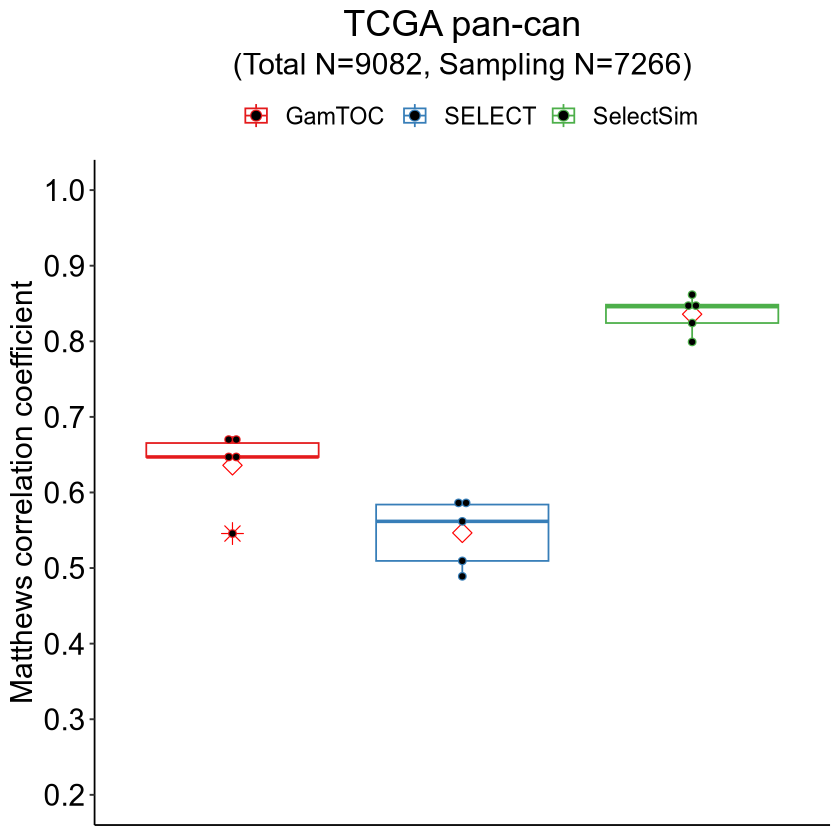

In [41]:
p

In [ ]:
saveRDS(plot_jaccard,file='/mnt/ptemp/arvind/tool_comaprision/pan_can_plot_mcc_data.rds')

# LUAD

## SelectSim

In [42]:
select_orginal <- (readRDS('/mnt/ptemp/arvind/catalogue_work_update/data/results/tumor_run/tcga/tcga_LUAD.rds'))$result

In [43]:
boot_results <- list()
k=1
for (i in c(1:10)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/selectX/sampling_run_selectX_v4_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- (readRDS(file=name))$result
    k=k+1
}

In [44]:
length(boot_results)

[1] 10

In [45]:
head(boot_results[[1]])

,SFE_1,SFE_2,name,support_1,support_2,freq_1,freq_2,overlap,w_overlap,max_overlap,⋯,w_r_overlap,wES,wFDR,nES,mean_r_nES,nFDR,cum_freq,nFDR2,type,FDR
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
EGFR - KRAS,EGFR,KRAS,EGFR - KRAS,50,122,0.12468828,0.3042394,0,0.000000,50,⋯,15.103560,-10.679830,0.000000000,-9.460696,-1.2191335,0.0000000000,172,0.0000000000,ME,TRUE
KRAS - TP53,KRAS,TP53,KRAS - TP53,122,180,0.30423940,0.4488778,43,32.382186,122,⋯,48.137634,-11.140784,0.000000000,-9.375665,-1.7651192,0.0000000000,302,0.0000000000,ME,TRUE
STK11 - TP53,STK11,TP53,STK11 - TP53,47,180,0.11720698,0.4488778,10,7.769323,47,⋯,18.491694,-7.581862,0.001109878,-6.361211,-1.2206505,0.0003699593,227,0.0003699593,ME,TRUE
BRAF - KRAS,BRAF,KRAS,BRAF - KRAS,28,122,0.06982544,0.3042394,2,1.025000,28,⋯,8.510871,-5.293310,0.004716981,-4.405507,-0.8878030,0.0022197558,150,0.0022197558,ME,TRUE
EGFR - STK11,EGFR,STK11,EGFR - STK11,50,47,0.12468828,0.1172070,0,0.000000,47,⋯,5.939998,-4.200213,0.014428413,-3.341331,-0.8588823,0.0062153163,97,0.0062153163,ME,TRUE
KRAS - NF1,KRAS,NF1,KRAS - NF1,122,29,0.30423940,0.0723192,4,3.250000,29,⋯,8.786415,-3.914837,0.014844617,-2.982953,-0.9318839,0.0079541250,151,0.0077691454,ME,TRUE


In [46]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(nFDR2<=0.25) 

In [47]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$name)
rownames(score_df)<-score_df$pairs
#score_df$Run_100<-1

In [48]:
selectX_mcc <- list()
selectX_recall<-list()

In [49]:
dim(select_orginal)

[1] 36046    22

In [50]:
dim(score_df)

[1] 57  1

In [51]:
for (t in c(1:10)){
    temp <- (boot_results[[t]] %>% filter(name %in% score_df$pairs) %>% filter(nFDR2<=0.25))$name
    conf <- confusion_matrix(score_df$pairs,temp,setdiff(select_orginal$name,score_df$pairs))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    selectX_mcc[[t]]<-mcc
    selectX_recall <- conf[[1]]/(conf[[1]]+conf[[2]])
}

In [52]:
conf

[[1]]
[1] 38

[[2]]
[1] 19

[[3]]
[1] 0

[[4]]
[1] 35989

In [53]:
45/(45+11)

[1] 0.8035714

In [54]:
round(mean(unlist(selectX_mcc)),3)

[1] 0.869

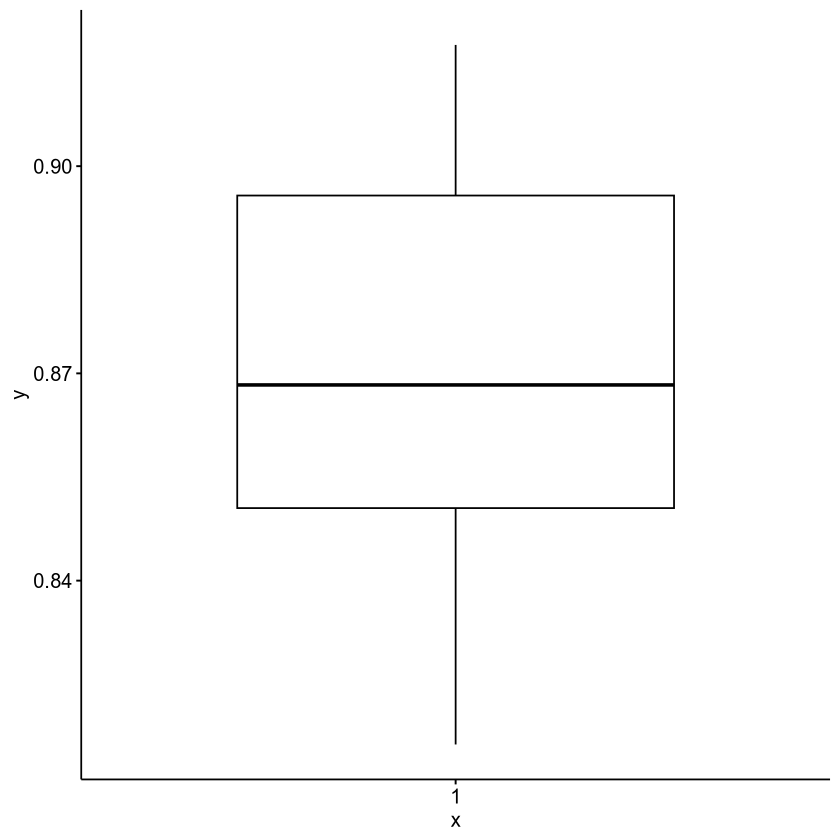

In [55]:
ggboxplot(unlist(selectX_mcc))

## Select

In [56]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/select/luad_all_results.rds')

In [57]:
boot_results <- list()
k=1
for (i in c(1:10)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/select/sampling_run_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [58]:
length(boot_results)

[1] 10

In [59]:
head(boot_results[[1]])

,SFE_1,SFE_2,name,type_1,type_2,int_type,support_1,support_2,freq_1,freq_2,⋯,abs_diff_overlap,direction,wMI_stat,wMI_p.value,ME_p.value,E.r.wMI_stat,MI_diff,wMI_p.value_FDR,select_score_good_cancer_cell_2017_criterion_1,select_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
AKT1 - ALK,AKT1,ALK,AKT1 - ALK,MUT,MUT,MUT - MUT,3,3,0.007978723,0.007978723,⋯,0.026,ME,0.002341008,1.000,0.974,0.002341008,0.000000000,FALSE,FALSE,NA
AKT1 - APC,AKT1,APC,AKT1 - APC,MUT,MUT,MUT - MUT,3,8,0.007978723,0.021276596,⋯,0.078,ME,0.004773510,1.000,0.925,0.004773510,0.000000000,FALSE,FALSE,NA
AKT1 - AR,AKT1,AR,AKT1 - AR,MUT,MUT,MUT - MUT,3,2,0.007978723,0.005319149,⋯,0.026,ME,0.001549930,1.000,0.974,0.001549930,0.000000000,FALSE,FALSE,NA
AKT1 - ATM,AKT1,ATM,AKT1 - ATM,MUT,MUT,MUT - MUT,3,15,0.007978723,0.039893617,⋯,0.141,ME,0.005967738,0.869,0.864,0.005967738,0.000000000,FALSE,FALSE,NA
AKT1 - BAP1,AKT1,BAP1,AKT1 - BAP1,MUT,MUT,MUT - MUT,3,4,0.007978723,0.010638298,⋯,0.042,ME,0.002980355,1.000,0.958,0.002980355,0.000000000,FALSE,FALSE,NA
AKT1 - BRAF,AKT1,BRAF,AKT1 - BRAF,MUT,MUT,MUT - MUT,3,28,0.007978723,0.074468085,⋯,0.737,CO,0.001839621,1.000,0.241,0.005861722,-0.004022101,FALSE,FALSE,NA


In [60]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(wMI_p.value_FDR) 

In [61]:
select_orginal %>% filter(wMI_p.value_FDR)  %>% count()

n
<int>
20


In [62]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$name)
rownames(score_df)<-score_df$pairs
#score_df$Run_100<-1

In [63]:
head(score_df)

,pairs
,<chr>
BRAF - KRAS,BRAF - KRAS
CARD11 - ARID1A,CARD11 - ARID1A
CDH1 - SMAD2,CDH1 - SMAD2
EGFR - KRAS,EGFR - KRAS
EGFR - STK11,EGFR - STK11
EZH2 - GNAS,EZH2 - GNAS


In [64]:
select_mcc <- list()

In [65]:
for (t in c(1:10)){
    #score_df[[paste('Run',i,sep="_")]]<-0
    temp <- (boot_results[[t]] %>% filter(name %in% score_df$pairs) %>% filter(wMI_p.value_FDR))$name
    #select_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    conf <- confusion_matrix(score_df$pairs,temp,setdiff(select_orginal$name,score_df$pairs))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    select_mcc[[t]]<-mcc
    #score_df[temp,][[paste('Run',i,sep="_")]]<-1
}

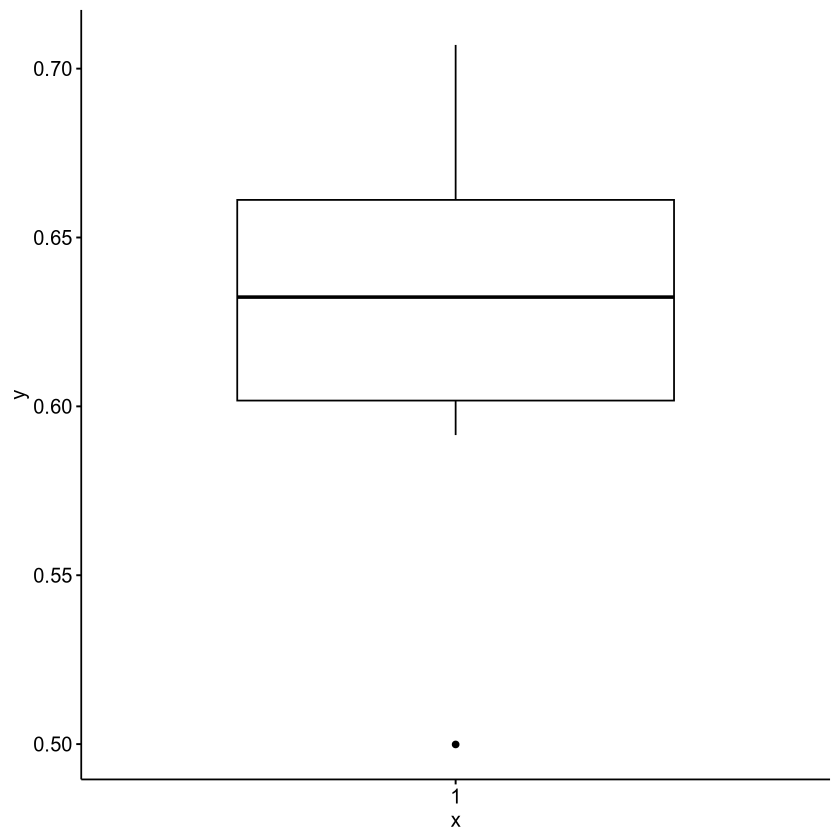

In [66]:
ggboxplot(unlist(select_mcc))

## GAMToc

In [67]:
select_orginal <- read.table('/mnt/ptemp/arvind/tool_comaprision/results/gamtoc/luad_all.txt',header = TRUE)

In [68]:
boot_results <- list()
k=1
for (i in c(1:5)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/tool/gamtoc/luad_run/luad_results/luad_V',i,'.txt',sep="")
    boot_results[[k]] <- read.table(file=name,header = TRUE)
    k=k+1
}

In [69]:
for (i in c(11:15)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/tool/gamtoc/luad_run/luad_results/luad_V',i,'_result.txt',sep="")
    boot_results[[k]] <- read.table(file=name,header = TRUE)
    k=k+1
}

In [70]:
length(boot_results)

[1] 10

In [71]:
head(boot_results[[10]])

,node1,node2,corr,tc,log.hyg,importance
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,EGFR,KRAS,-0.23,0,0,0
2,EGFR,BRAF,-0.07,0,0,0
3,KRAS,BRAF,-0.18,0,0,0
4,EGFR,TP53,0.01,0,0,0
5,KRAS,TP53,-0.21,0,0,0
6,BRAF,TP53,0.04,0,0,0


In [72]:
length(unique(paste(select_orginal$node2,select_orginal$node1,sep=' - ')))

[1] 21

In [73]:
select_orginal

node1,node2,corr,tc,log.hyg,importance
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EGFR,KRAS,-0.25,0,0,0
EGFR,TP53,0.04,0,0,0
KRAS,TP53,-0.22,0,0,0
EGFR,STK11,-0.14,0,0,0
KRAS,STK11,0.12,0,0,0
TP53,STK11,-0.18,0,0,0
EGFR,KEAP1,-0.10,0,0,0
KRAS,KEAP1,0.04,0,0,0
TP53,KEAP1,-0.09,0,0,0


In [74]:
selectX_100_pct_significnat_results <- select_orginal

In [75]:
select_orginal %>% count()

n
<int>
21


In [76]:
score_df<-data.frame('pairs'=paste(select_orginal$node2,select_orginal$node1,sep=' - '))
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [77]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
KRAS - EGFR,KRAS - EGFR,1
TP53 - EGFR,TP53 - EGFR,1
TP53 - KRAS,TP53 - KRAS,1
STK11 - EGFR,STK11 - EGFR,1
STK11 - KRAS,STK11 - KRAS,1
STK11 - TP53,STK11 - TP53,1


In [78]:
gamtoc_mcc <- list()

In [79]:
112*111/2

[1] 6216

In [80]:
for (t in c(1:10)){
    #score_df[[paste('Run',i,sep="_")]]<-0
    boot_results[[t]]$name_2 <- paste(boot_results[[t]]$node2,boot_results[[t]]$node1,sep=' - ')
    temp <- (boot_results[[t]] %>% filter(name_2 %in% score_df$pairs))$name_2
    #score_df[temp,][[paste('Run',i,sep="_")]]<-1
    #gamtoc_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    possible <- 6216-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    #print(e)
    gamtoc_mcc[[t]]<-mcc
}

In [81]:
gamtoc_mcc

[[1]]
[1] 0.8160357

[[2]]
[1] 0.6894537

[[3]]
[1] 0.8447453

[[4]]
[1] 0.8447453

[[5]]
[1] 0.6165668

[[6]]
[1] 0.8160357

[[7]]
[1] 0.6894537

[[8]]
[1] 0.8447453

[[9]]
[1] 0.8447453

[[10]]
[1] 0.6165668

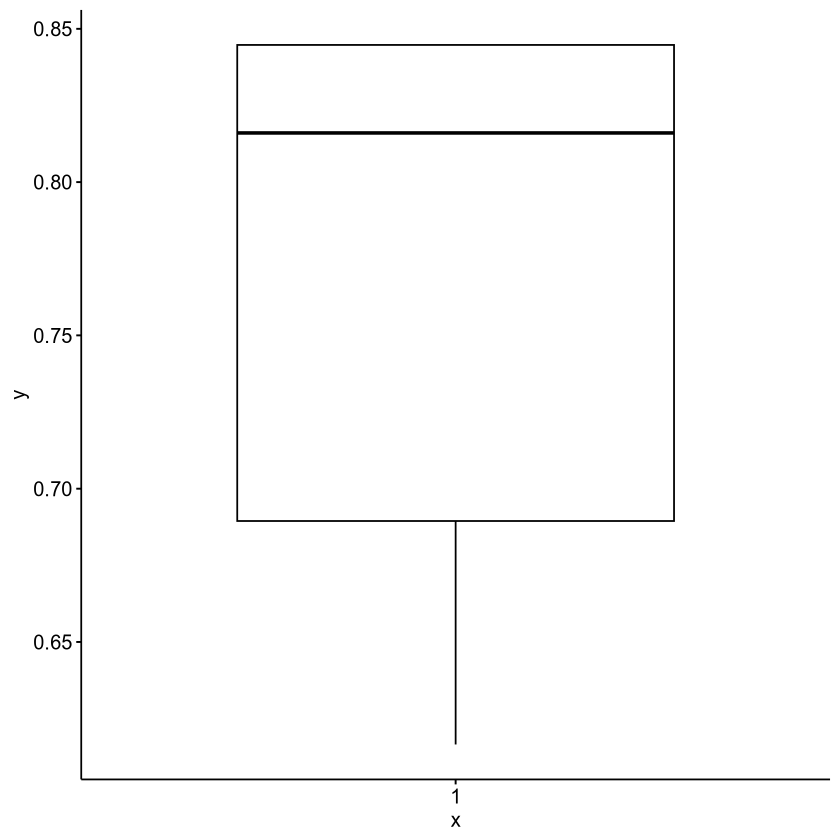

In [82]:
ggboxplot(unlist(gamtoc_mcc))

## Discover

In [83]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/Discover/luad_all.rds')

In [84]:
boot_results <- list()
k=1
for (i in c(1:10)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/Discover/sampling_run_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [85]:
length(boot_results)

[1] 10

In [86]:
head(boot_results[[1]])

,gene1,gene2,p.value,q.value,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
7,KRAS,EGFR,5.168980e-10,1.637007e-09,ME
24,TP53,STK11,9.902545e-05,6.124225e-04,ME
10,STK11,EGFR,1.804629e-04,7.117364e-04,ME
19,TP53,KRAS,3.001285e-04,9.796278e-04,ME
3,KRAS,BRAF,6.082680e-04,1.370175e-03,ME
11,KEAP1,EGFR,5.566849e-03,2.139584e-02,ME


In [87]:
head(select_orginal)

,gene1,gene2,p.value,q.value,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
9,KRAS,EGFR,5.262128e-12,1.291624e-11,ME
24,TP53,KRAS,6.338431e-06,2.798847e-05,ME
34,TP53,STK11,2.300666e-05,7.399900e-05,ME
4,KRAS,BRAF,2.755737e-05,7.399900e-05,ME
12,STK11,EGFR,3.197317e-05,7.399900e-05,ME
23,SMARCA4,KRAS,2.293668e-03,7.316367e-03,ME


In [88]:
length(unique(paste(select_orginal$gene2,select_orginal$gene1,sep=' - ')))

[1] 38

In [89]:
selectX_100_pct_significnat_results <- select_orginal

In [90]:
select_orginal %>% count()

n
<int>
38


In [91]:
score_df<-data.frame('pairs'=paste(select_orginal$gene2,select_orginal$gene1,sep=' - '))
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [92]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
EGFR - KRAS,EGFR - KRAS,1
KRAS - TP53,KRAS - TP53,1
STK11 - TP53,STK11 - TP53,1
BRAF - KRAS,BRAF - KRAS,1
EGFR - STK11,EGFR - STK11,1
KRAS - SMARCA4,KRAS - SMARCA4,1


In [93]:
discover_mcc<-list()

In [94]:
396*395/2

[1] 78210

In [95]:
for (t in c(1:10)){
    score_df[[paste('Run',i,sep="_")]]<-0
    boot_results[[t]]$name_2 <- paste(boot_results[[t]]$gene2,boot_results[[t]]$gene1,sep=' - ')
    temp <- (boot_results[[t]] %>% filter(name_2 %in% score_df$pairs))$name_2
    score_df[temp,][[paste('Run',i,sep="_")]]<-1
    #discover_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    possible <- 78210-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    #print(e)
    discover_mcc[[t]]<-mcc
    
}

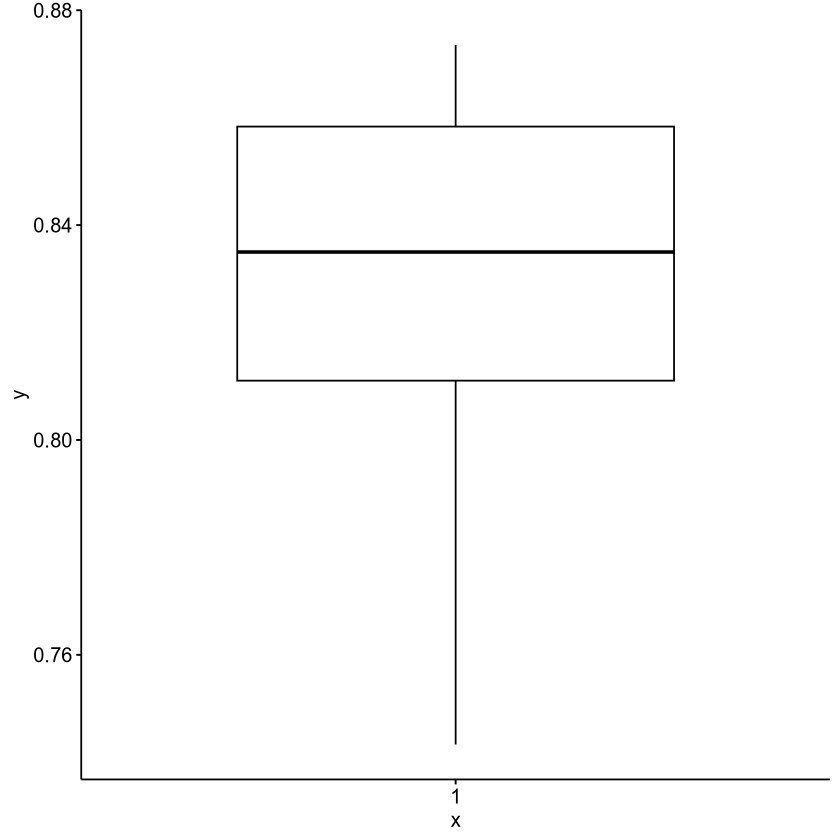

In [96]:
ggboxplot(unlist(discover_mcc))

## weSME

In [97]:
wesme_me <- read.table('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_smut_me_pvs_0.1.txt',sep="	",header = TRUE)
wesme_co <- read.table('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_smut_co_pvs_0.1.txt',sep="	",,header = TRUE)
wesme <- rbind(wesme_me,wesme_co[,colnames(wesme_me)])
wesme$type <- c(rep("ME",nrow(wesme_me)),rep("CO",nrow(wesme_co)))

In [98]:
select_orginal<-wesme

In [99]:
boot_results <- list()
k=1
for (i in c(1:5)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_',i,'_smut_me_pvs_0.1.txt',sep="")
    wesme_me <- read.table(name,sep="	",header = TRUE)
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_',i,'_smut_co_pvs_0.1.txt',sep="")
    wesme_co <- read.table(name,sep="	",,header = TRUE)
    wesme <- rbind(wesme_me,wesme_co[,colnames(wesme_me)])
    wesme$type <- c(rep("ME",nrow(wesme_me)),rep("CO",nrow(wesme_co)))
    boot_results[[k]] <- wesme
    k=k+1
}

In [100]:
for (i in c(11:15)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_',i,'_smut_me_pvs_0.1.txt',sep="")
    wesme_me <- read.table(name,sep="	",header = TRUE)
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/wesme/LUAD_',i,'_smut_co_pvs_0.1.txt',sep="")
    wesme_co <- read.table(name,sep="	",,header = TRUE)
    wesme <- rbind(wesme_me,wesme_co[,colnames(wesme_me)])
    wesme$type <- c(rep("ME",nrow(wesme_me)),rep("CO",nrow(wesme_co)))
    boot_results[[k]] <- wesme
    k=k+1
}

In [101]:
length(boot_results)

[1] 10

In [102]:
head(boot_results[[1]])

,gene1,gene2,jaccard.index,pv..ws.,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,APC,KRAS,0.00000000,0.00718,ME
2,ATM,TP53,0.02162162,0.00348,ME
3,BRAF,KRAS,0.01324503,0.00003,ME
4,BRAF,KEAP1,0.00000000,0.05470,ME
5,CDKN2A,KRAS,0.02205882,0.09510,ME
6,CTNNB1,KRAS,0.00000000,0.00403,ME


In [103]:
head(select_orginal)

,gene1,gene2,jaccard.index,pv..ws.,type
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,APC,KRAS,0.006134969,0.03900,ME
2,APC,TP53,0.013157895,0.07060,ME
3,ATM,TP53,0.016736402,0.00018,ME
4,BRAF,EGFR,0.022222222,0.05790,ME
5,BRAF,KRAS,0.010695187,0.00000,ME
6,BRAF,STK11,0.021739130,0.04880,ME


In [104]:
length(unique(paste(select_orginal$gene2,select_orginal$gene1,sep=' - ')))

[1] 827

In [105]:
selectX_100_pct_significnat_results <- select_orginal

In [106]:
select_orginal %>% count()

n
<int>
827


In [107]:
score_df<-data.frame('pairs'=paste(select_orginal$gene2,select_orginal$gene1,sep=' - '))
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [108]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
KRAS - APC,KRAS - APC,1
TP53 - APC,TP53 - APC,1
TP53 - ATM,TP53 - ATM,1
EGFR - BRAF,EGFR - BRAF,1
KRAS - BRAF,KRAS - BRAF,1
STK11 - BRAF,STK11 - BRAF,1


In [109]:
weSME_mcc<-list()

In [110]:
for (t in c(1:10)){
    score_df[[paste('Run',t,sep="_")]]<-0
    boot_results[[t]]$name_2 <- paste(boot_results[[t]]$gene2,boot_results[[t]]$gene1,sep=' - ')
    temp <- (boot_results[[t]] %>% filter(name_2 %in% score_df$pairs))$name_2
    score_df[temp,][[paste('Run',t,sep="_")]]<-1
    #weSME_jaccard[[t]]<-jaccard(score_df$pairs,temp) 
    possible <- 78210-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    weSME_mcc[[t]]<-mcc
}

In [111]:
weSME_mcc

[[1]]
[1] 0.8786443

[[2]]
[1] 0.8744822

[[3]]
[1] 0.8723939

[[4]]
[1] 0.8896514

[[5]]
[1] 0.8469459

[[6]]
[1] 0.8639919

[[7]]
[1] 0.8462284

[[8]]
[1] 0.8689026

[[9]]
[1] 0.8793362

[[10]]
[1] 0.8490948

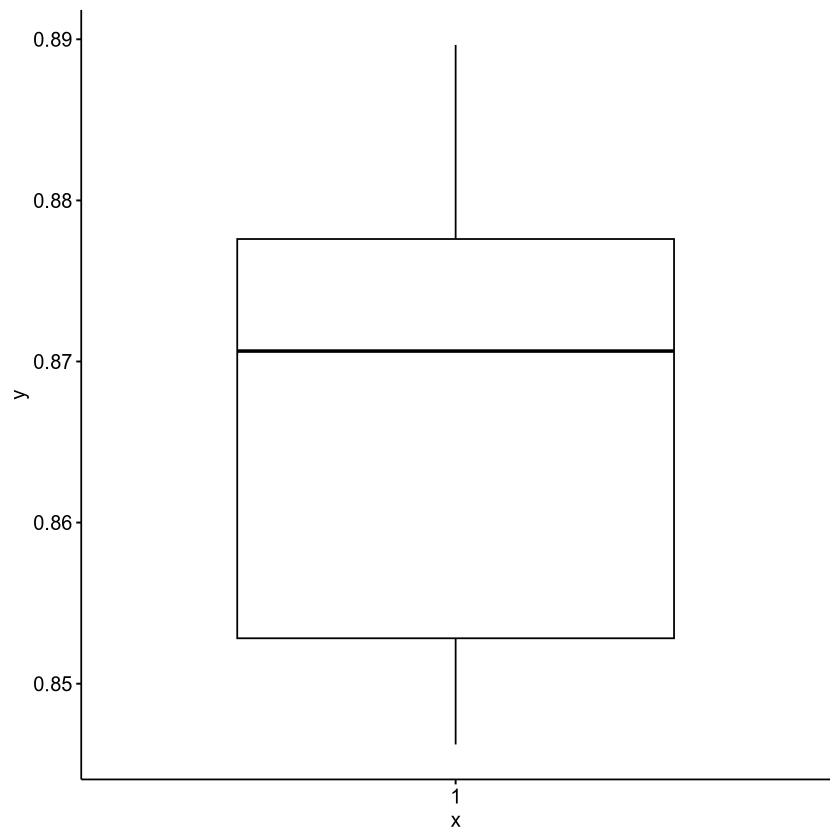

In [112]:
ggboxplot(unlist(weSME_mcc))

## coselns 

In [113]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/coselens/coselns_luad_all_results.rds')

In [114]:
boot_results <- list()
k=1
for (i in c(1:10)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/coselens/luad_sampling_run_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [115]:
length(boot_results)

[1] 10

In [116]:
head(boot_results[[1]])

,gene_name,num.drivers.group1,num.drivers.group2,pmis,ptrunc,pall,pind,pglobal,qall,qglobal,DeltaNd,type,split_gene,pair
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ABL1,2.650543e-02,0.0009875042,0.4712079,1,0.77138244,1,0.9716109,1.0000000,1,0.025517929,CO,EP400,EP400 - ABL1
2,ACTG1,-9.009542e-05,0.0107835776,0.8769490,1,0.98808415,1,0.9999287,1.0000000,1,-0.010873673,ME,EP400,EP400 - ACTG1
3,ACVR1,-7.785338e-04,0.0134844626,0.8564205,1,0.98376493,1,0.9998675,1.0000000,1,-0.014262996,ME,EP400,EP400 - ACVR1
4,AJUBA,-3.775796e-04,0.0051549760,0.9113446,1,0.99382058,1,0.9999809,1.0000000,1,-0.005532556,ME,EP400,EP400 - AJUBA
5,AKT1,6.643469e-02,0.0051965984,0.0241362,1,0.07867662,1,0.2787048,0.5567185,1,0.061238097,CO,EP400,EP400 - AKT1
6,AKT2,3.308704e-02,0.0162232109,0.5490480,1,0.83567735,1,0.9856920,1.0000000,1,0.016863824,CO,EP400,EP400 - AKT2


In [117]:
dim(select_orginal)

[1] 1254   14

In [118]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(gene_name!=split_gene) %>% mutate('id'=case_when(gene_name>split_gene ~ paste(split_gene,gene_name,sep=" - "),
                                       gene_name<split_gene ~ paste(gene_name,split_gene,sep=" - "))) %>%  filter(qall<=0.05) 

In [119]:
selectX_100_pct_significnat_results <- selectX_100_pct_significnat_results[!duplicated(selectX_100_pct_significnat_results$id),]

In [120]:
dim(selectX_100_pct_significnat_results)

[1] 442  15

In [121]:
selectX_100_pct_significnat_results %>% count()

n
<int>
442


In [122]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$id)
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [123]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
AMER1 - EP400,AMER1 - EP400,1
DICER1 - EP400,DICER1 - EP400,1
EP400 - PDGFRA,EP400 - PDGFRA,1
EP400 - PLCG2,EP400 - PLCG2,1
EP400 - PTPRD,EP400 - PTPRD,1
EP400 - PTPRT,EP400 - PTPRT,1


In [124]:
dim(score_df)

[1] 442   2

In [125]:
coselns_mcc<-list()

In [126]:
for (t in c(1:10)){
    score_df[[paste('Run',t,sep="_")]]<-0
    test<- boot_results[[t]] %>% filter(gene_name!=split_gene) %>% mutate('id'=case_when(gene_name>split_gene ~ paste(split_gene,gene_name,sep=" - "),
                                       gene_name<split_gene ~ paste(gene_name,split_gene,sep=" - "))) %>%  filter(qall<=0.05) 
    test<- test[!duplicated(test$id),]
    temp <- unique(test$id)
    pairs <- intersect(score_df$pairs,temp)
    score_df[pairs,][[paste('Run',t,sep="_")]]<-1
    #coselns_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    
    possible <- 1254-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    coselns_mcc[[t]]<-mcc
}

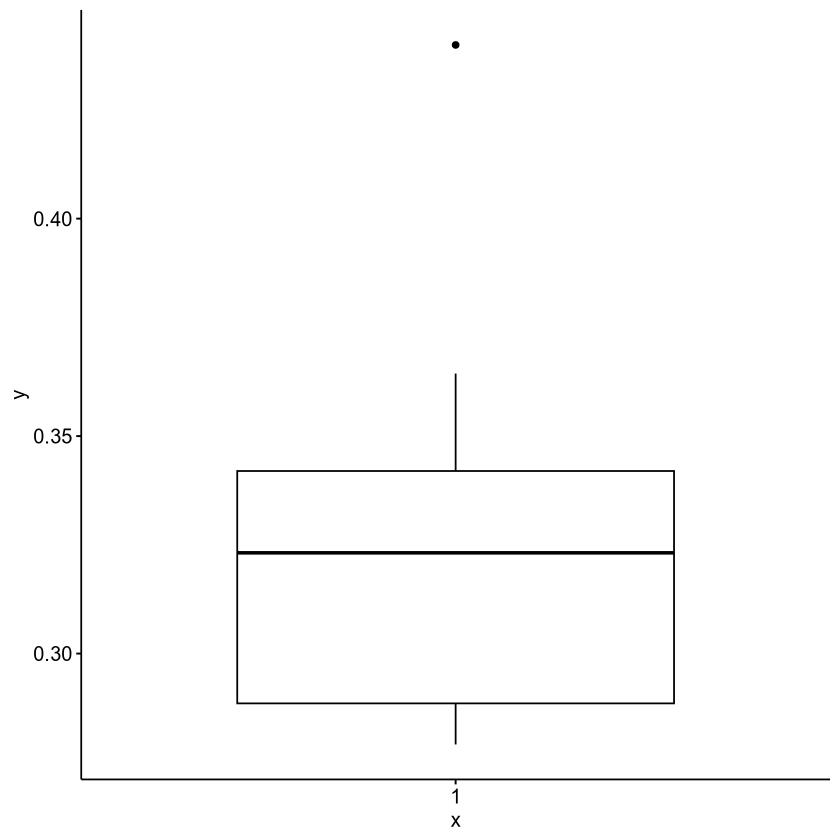

In [127]:
ggboxplot(unlist(coselns_mcc))

## Cooccur

In [130]:
select_orginal <- readRDS('/mnt/ptemp/arvind/tool_comaprision/results/cooccur/cooccur_luad_all_results.rds')

In [131]:
head(select_orginal)

,sp1,sp2,sp1_inc,sp2_inc,obs_cooccur,prob_cooccur,exp_cooccur,p_lt,p_gt,sp1_name,sp2_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,63,3,221,2,0.003,1.3,0.91533,0.41061,AKT1,TP53
2,2,35,6,154,3,0.004,1.8,0.92524,0.26745,ALK,KRAS
3,2,63,6,221,5,0.005,2.6,0.99299,0.06169,ALK,TP53
4,3,17,10,57,2,0.002,1.1,0.90658,0.31669,APC,EGFR
5,3,35,10,154,1,0.006,3.1,0.13645,0.97538,APC,KRAS
6,3,62,10,59,1,0.002,1.2,0.66766,0.71703,APC,STK11


In [132]:
boot_results <- list()
k=1
for (i in c(1:10)){
    name <- paste('/mnt/ptemp/arvind/tool_comaprision/results/cooccur/luad_sampling/sampling_run_result_80_',i,'.rds',sep="")
    boot_results[[k]] <- readRDS(file=name)
    k=k+1
}

In [133]:
length(boot_results)

[1] 10

In [134]:
head(boot_results[[1]])

,sp1,sp2,sp1_inc,sp2_inc,obs_cooccur,prob_cooccur,exp_cooccur,p_lt,p_gt,sp1_name,sp2_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,63,3,180,2,0.003,1.3,0.91039,0.42339,AKT1,TP53
2,2,63,3,180,3,0.003,1.3,1.00000,0.08961,ALK,TP53
3,3,35,8,122,0,0.006,2.4,0.05324,1.00000,APC,KRAS
4,3,63,8,180,3,0.009,3.6,0.47916,0.78042,APC,TP53
5,5,7,15,28,1,0.003,1.0,0.71805,0.66909,ATM,BRAF
6,5,17,15,50,1,0.005,1.9,0.42112,0.86944,ATM,EGFR


In [135]:
selectX_100_pct_significnat_results <- select_orginal %>% filter(p_lt<=0.05 | p_gt<=0.05) %>% mutate('id'=case_when(sp1_name>sp2_name ~ paste(sp2_name,sp1_name,sep=" - "),
                                       sp1_name<sp2_name ~ paste(sp1_name,sp2_name,sep=" - "))) 

In [136]:
selectX_100_pct_significnat_results <- selectX_100_pct_significnat_results[!duplicated(selectX_100_pct_significnat_results$id),]

In [137]:
dim(selectX_100_pct_significnat_results)

[1] 31 12

In [138]:
selectX_100_pct_significnat_results %>% count()

n
<int>
31


In [139]:
score_df<-data.frame('pairs'=selectX_100_pct_significnat_results$id)
rownames(score_df)<-score_df$pairs
score_df$Run_100<-1

In [140]:
head(score_df)

,pairs,Run_100
,<chr>,<dbl>
ATM - KRAS,ATM - KRAS,1
ATM - STK11,ATM - STK11,1
ATM - TP53,ATM - TP53,1
BRAF - KRAS,BRAF - KRAS,1
BRAF - SETD2,BRAF - SETD2,1
CDKN2A - TP53,CDKN2A - TP53,1


In [141]:
dim(select_orginal)

[1] 288  11

In [142]:
cooccur_mcc <- list()

In [143]:
for (t in c(1:10)){
    score_df[[paste('Run',i,sep="_")]]<-0
    test<- boot_results[[t]]  %>% filter(p_lt<=0.05 | p_gt<=0.05) %>% mutate('id'=case_when(sp1_name>sp2_name ~ paste(sp2_name,sp1_name,sep=" - "),
                                       sp1_name<sp2_name ~ paste(sp1_name,sp2_name,sep=" - ")))  
    test<- test[!duplicated(test$id),]
    temp <- unique(test$id)
    pairs <- intersect(score_df$pairs,temp)
    score_df[pairs,][[paste('Run',i,sep="_")]]<-1
    #cooccur_jaccard[[i]]<-jaccard(score_df$pairs,temp)
    
    possible <- 288-length(score_df$pairs)
    conf <- confusion_matrix(score_df$pairs,temp,c(1:possible))
    a<- as.numeric((conf[[1]]+conf[[3]]))
    b<- as.numeric((conf[[1]]+conf[[2]]))
    c<- as.numeric((conf[[4]]+conf[[2]]))   
    d<- as.numeric((conf[[4]]+conf[[3]])) 
    e <- as.numeric((conf[[1]]*conf[[4]]))
    f <- as.numeric((conf[[2]]*conf[[3]]))
    g <- as.numeric(e-f)
    h <- as.numeric(a*b*c*d)
    i <- sqrt(h)
    mcc <- g/i
    cooccur_mcc[[t]]<-mcc
}

In [144]:
cooccur_mcc

[[1]]
[1] 0.6543467

[[2]]
[1] 0.8492047

[[3]]
[1] 0.7213141

[[4]]
[1] 0.7870678

[[5]]
[1] 0.7558014

[[6]]
[1] 0.8145415

[[7]]
[1] 0.7655969

[[8]]
[1] 0.7870678

[[9]]
[1] 0.8554035

[[10]]
[1] 0.7870678

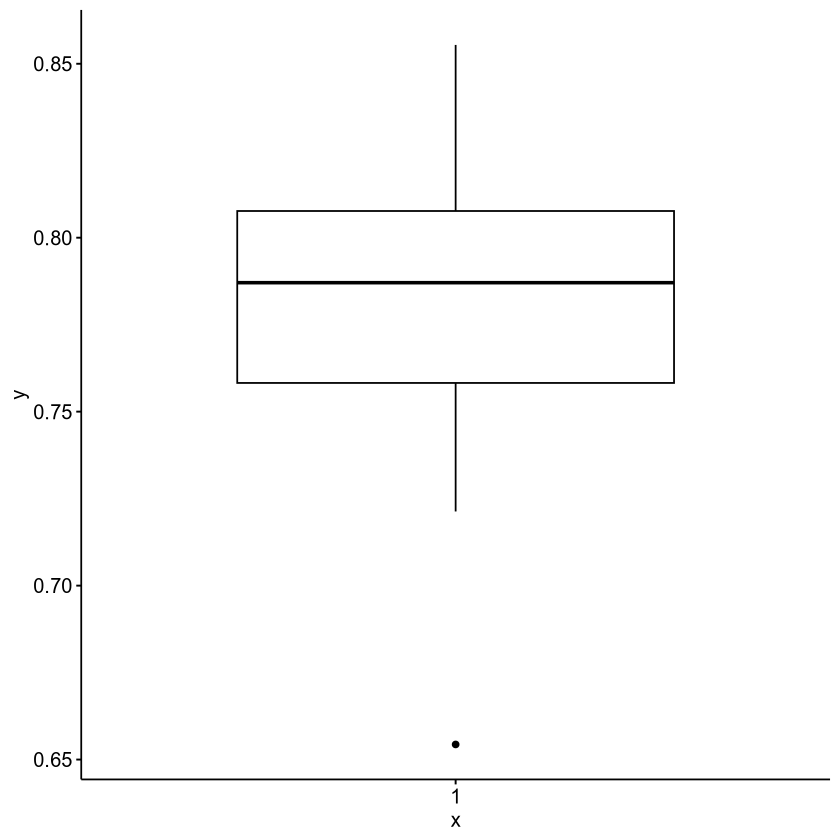

In [145]:
ggboxplot(unlist(cooccur_mcc))

## Combine results

In [146]:
plot_jaccard <- data.frame('jaccard'=c(
                                      unlist(selectX_mcc),
                                      unlist(select_mcc),
                                      unlist(gamtoc_mcc),
                                      unlist(discover_mcc),
                                      unlist(weSME_mcc),
                                      unlist(coselns_mcc),
                                      unlist(cooccur_mcc))
                          )

In [147]:
plot_jaccard$name<-c(
                  rep('SelectSim',10),
                  rep('select',10),
                  rep('GamTOC',10),
                  rep('Discover',10),
                  rep('weSME/weSCO',10),
                  rep('Coselns',10),
                  rep('cooccur',10))

In [148]:
head(plot_jaccard)

,jaccard,name
,<dbl>,<chr>
1,0.8582162,SelectSim
2,0.8162811,SelectSim
3,0.8982043,SelectSim
4,0.8883752,SelectSim
5,0.8582162,SelectSim
6,0.9079275,SelectSim


In [149]:
p <- ggplot(plot_jaccard, aes(x=name, y=jaccard,color=name)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4)

In [150]:
p<-p+stat_summary(fun=mean, geom="point", shape=23, size=4,color='red')+
geom_dotplot(binaxis='y', stackdir='center', dotsize=1,binwidth=0.01)+
scale_color_brewer(palette="Set1")+theme_pubr()+scale_x_discrete(limits=c("SelectSim", "weSME/weSCO", 'GamTOC',"Discover",'select','cooccur','Coselns'))+ggtitle('TCGA LUAD')+
labs(subtitle = '(Total N=502, Sampling N=401)')+xlab('')+ylab('Matthews correlation coefficient')+scale_y_continuous(breaks = seq(0, 1, 0.1),limits = c(0.2,1))+
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        plot.subtitle =  element_text(hjust = 0.5),
        text = element_text(size = 18),
        legend.position = 'top',
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 14))

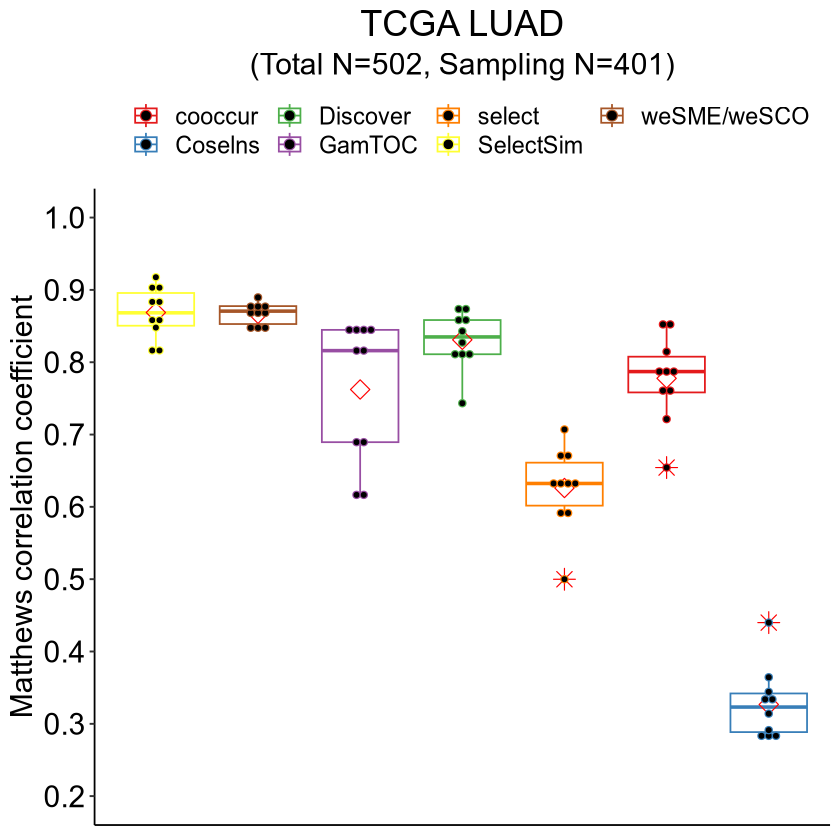

In [151]:
p

In [255]:
saveRDS(plot_jaccard,file='luad_mcc_v5.rds')